In [1]:
from pharynx_analysis import (pharynx_io as pio, image_processing as ip, experiment, plots, unet_model)
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from importlib import reload
from skimage import measure, transform
from collections import namedtuple
import pdb
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
from sklearn.preprocessing import scale
import pandas as pd
from scipy.signal import find_peaks
from pprint import pprint
from pathlib import Path
from skimage import io as skio
import skimage

Using TensorFlow backend.
/Users/sean/.local/share/virtualenvs/python-zUhjj0fC/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/sean/.local/share/virtualenvs/python-zUhjj0fC/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/sean/.local/share/virtualenvs/python-zUhjj0fC/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np

W0717 11:18:02.363664 4508661184 deprecation_wrapper.py:119] From /Users/sean/.local/share/virtualenvs/python-zUhjj0fC/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 11:18:02.399708 4508661184 deprecation_wrapper.py:119] From /Users/sean/.local/share/virtualenvs/python-zUhjj0fC/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 11:18:02.415018 4508661184 deprecation_wrapper.py:119] From /Users/sean/.local/share/virtualenvs/python-zUhjj0fC/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0717 11:18:02.454926 4508661184 deprecation_wrapper.py:119] From /Users/sean/.local/share/virtualenvs/python-zUhjj0fC/lib/python3.7/site-packages/keras/backend/t

In [29]:
masks = skimage.io.imread('/Users/sean/code/wormAnalysis/data/segmentation_training_data/2019_04_03_ASI_ablation/2019_04_03_ASI_ablation-410-0-seg.tif') // 255
imgs = skimage.io.imread('/Users/sean/code/wormAnalysis/data/segmentation_training_data/2019_04_03_ASI_ablation/2019_04_03_ASI_ablation-410-0.tif')

masks = np.reshape(masks, masks.shape + (1,))[:, :128, :128, :]
imgs = np.reshape(imgs, imgs.shape + (1,))[:, :128, :128, :]

In [31]:
model = unet_model.unet(input_size=(128,128,1))

In [32]:
model.fit(
    imgs, 
    masks, 
    batch_size=2,
    nb_epoch=10, 
    verbose=1,
    validation_split=0.2,
    shuffle=True,
)

/Users/sean/.local/share/virtualenvs/python-zUhjj0fC/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 98 samples, validate on 25 samples
Epoch 1/10
98/98 [==============================] - 116s 1s/step - loss: 0.6785 - acc: 0.9577 - val_loss: 0.5658 - val_acc: 0.9649
Epoch 2/10
98/98 [==============================] - 107s 1s/step - loss: 0.5525 - acc: 0.9657 - val_loss: 0.5658 - val_acc: 0.9649
Epoch 3/10
98/98 [==============================] - 108s 1s/step - loss: 0.5525 - acc: 0.9657 - val_loss: 0.5658 - val_acc: 0.9649
Epoch 4/10
98/98 [==============================] - 114s 1s/step - loss: 0.5525 - acc: 0.9657 - val_loss: 0.5658 - val_acc: 0.9649
Epoch 5/10
98/98 [==============================] - 124s 1s/step - loss: 0.5524 - acc: 0.9657 - val_loss: 0.5658 - val_acc: 0.9649
Epoch 6/10
98/98 [==============================] - 126s 1s/step - loss: 0.5524 - acc: 0.9657 - val_loss: 0.5658 - val_acc: 0.9649
Epoch 7/10
98/98 [==============================] - 110s 1s/step - loss: 0.5524 - acc: 0.9657 - val_loss: 0.5658 - val_acc: 0.9649
Epoch 8/10
98/98 [=====================

In [33]:
test_imgs = skimage.io.imread(
    '/Users/sean/code/wormAnalysis/data/segmentation_training_data/2018_11_29_hsf1_afd-DONE/2018_11_29_hsf1_afd-410-0.tif'
)
test_masks = skimage.io.imread(
    '/Users/sean/code/wormAnalysis/data/segmentation_training_data/2018_11_29_hsf1_afd-DONE/2018_11_29_hsf1_afd-seg-410-0.tif'
) // 255


test_imgs = np.reshape(test_imgs, test_imgs.shape + (1,))[:, :128, :128, :]
test_masks = np.reshape(test_masks, test_masks.shape + (1,))[:, :128, :128, :]

In [53]:
results = model.predict(imgs, verbose=1)

123/123 [==============================] - 26s 210ms/step


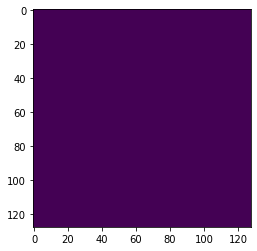

In [55]:
plt.imshow(results[0, :, :, 0])